In [9]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load .mat file
file = h5py.File('D:/IIT/SOC/Week_4/mnist.mat', 'r')

labels=np.array(file['labels_train']).T
images=np.array(file['digits_train']).T

# Accessing 50th label from the dataset
print(labels[50])

# Showing 50th image from the dataset
Image.fromarray(images[:,:,50]).show()

[3]


In [15]:
file = h5py.File('D:/IIT/SOC/Week_4/mnist.mat', 'r')

print(list(file.keys()))

['digits_test', 'digits_train', 'labels_test', 'labels_train']


In [47]:
data = h5py.File('D:/IIT/SOC/Week_4/mnist.mat', 'r')

images = np.array(data['digits_train'])
labels = np.array(data['labels_train'])

images = images.astype(float)

num_samples, num_rows, num_cols = images.shape
images = images.reshape(num_samples, num_rows * num_cols)

digits = np.arange(10)

for digit in digits:
    digit_images = images[labels.flatten() == digit]
    digit_mean = np.sum(digit_images, axis=0) / digit_images.shape[0]
    digit_cov = np.cov(digit_images.T)
    eigenvalues, eigenvectors = np.linalg.eig(digit_cov)
    max_idx = np.argmax(eigenvalues)   
    principal_mode = eigenvectors[:, max_idx]

    print(f"Digit: {digit}")
    print(f"Mean: {digit_mean}")
    print("Covariance Matrix:")
    print(digit_cov)
    print("Principal Mode of Variation (eigenvector v1):")
    print(principal_mode)
    print(f"Eigenvalue λ1: {eigenvalues[max_idx]}")

Digit: 0
Mean: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.94816816e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.57150093e-03
 2.70133378e-03 1.06365018e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.77933480e-03
 2.21171704e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.553266

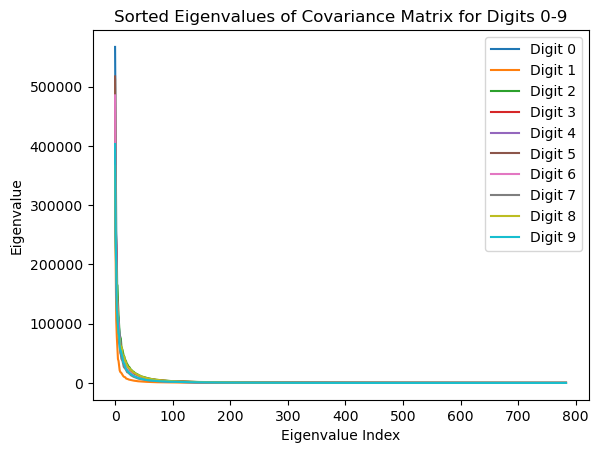

In [48]:
data = h5py.File('D:/IIT/SOC/Week_4/mnist.mat', 'r')
images = np.array(data['digits_train'])
labels = np.array(data['labels_train'])

images = images.astype(float)

num_samples, num_rows, num_cols = images.shape
images = images.reshape(num_samples, num_rows * num_cols)

digits = np.arange(10) 
for digit in digits:
    digit_images = images[labels.flatten() == digit]
    digit_cov = np.cov(digit_images.T)
    eigenvalues = np.linalg.eigvals(digit_cov)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    plt.plot(sorted_eigenvalues, label=f"Digit {digit}")

plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.title("Sorted Eigenvalues of Covariance Matrix for Digits 0-9")
plt.legend()
plt.show()

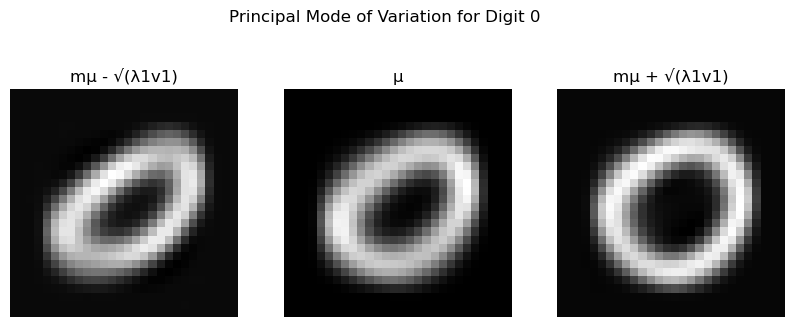

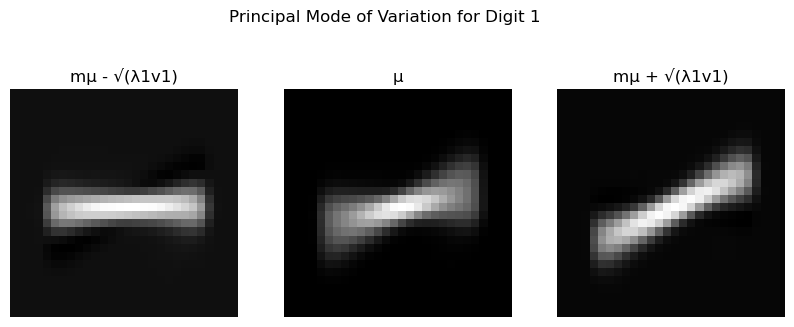

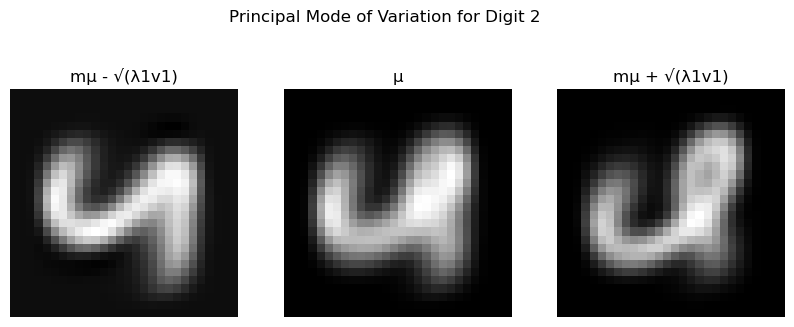

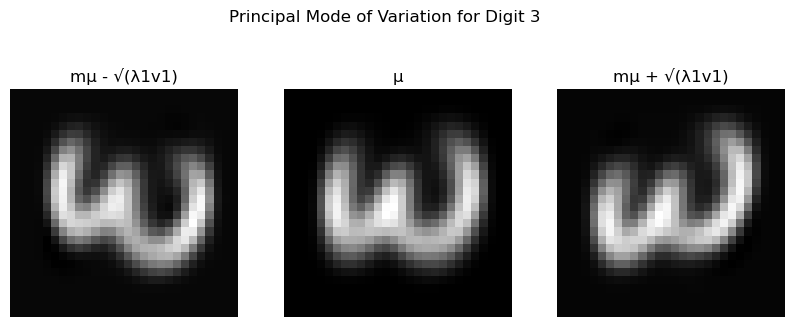

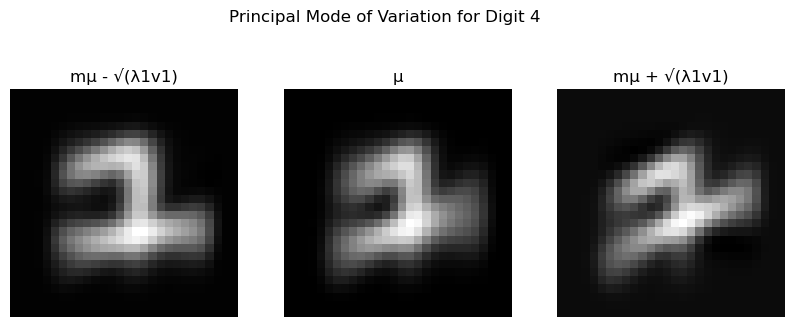

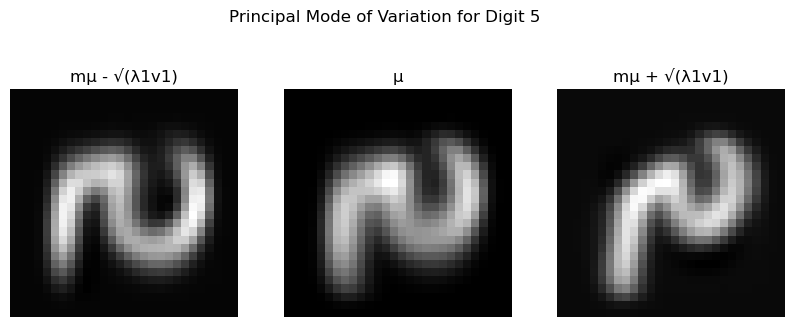

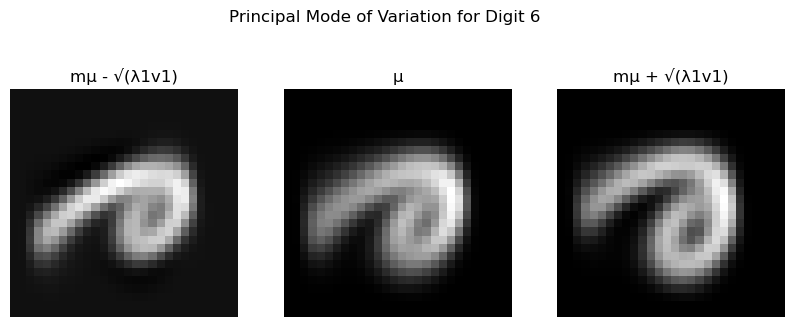

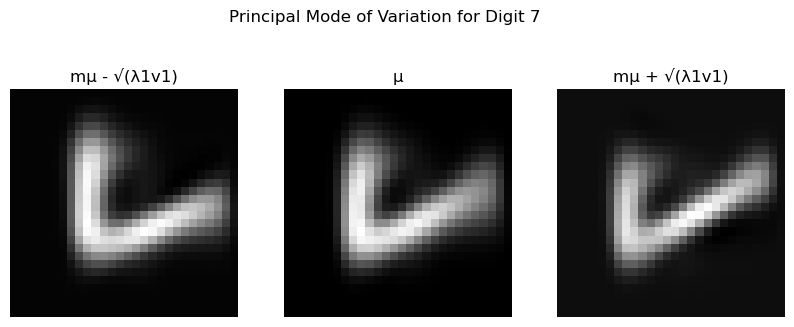

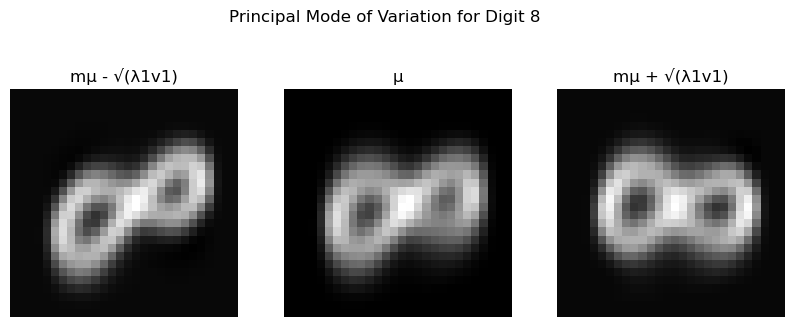

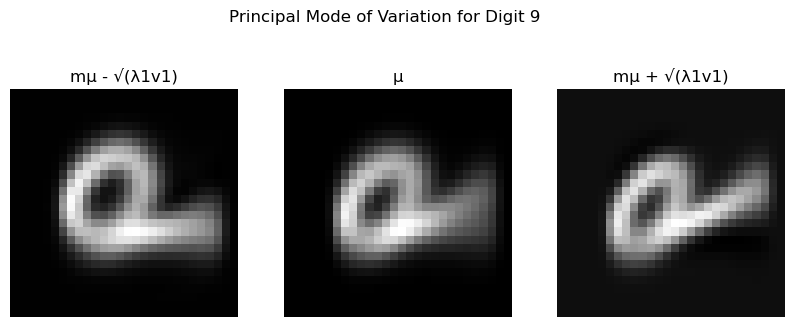

In [49]:
data = h5py.File('D:/IIT/SOC/Week_4/mnist.mat', 'r')

images = np.array(data['digits_train'])
labels = np.array(data['labels_train'])

images = images.astype(float)

num_samples, num_rows, num_cols = images.shape
images = images.reshape(num_samples, num_rows * num_cols)

digits = np.arange(10)  
for digit in digits:
    digit_images = images[labels.flatten() == digit]
    digit_mean = np.mean(digit_images, axis=0)
    digit_cov = np.cov(digit_images.T)
    eigenvalues, eigenvectors = np.linalg.eig(digit_cov)
    max_idx = np.argmax(eigenvalues)
    principal_mode = eigenvectors[:, max_idx]

    image1 = digit_mean - np.sqrt(eigenvalues[max_idx]) * np.real(principal_mode)
    image2 = digit_mean
    image3 = digit_mean + np.sqrt(eigenvalues[max_idx]) * np.real(principal_mode)

    image1 = image1.reshape(num_rows, num_cols)
    image2 = image2.reshape(num_rows, num_cols)
    image3 = image3.reshape(num_rows, num_cols)

    fig, axs = plt.subplots(1, 3, figsize=(10, 4))

    axs[0].imshow(np.real(image1), cmap='gray')
    axs[0].set_title("mµ - √(λ1v1)")
    axs[1].imshow(np.real(image2), cmap='gray')
    axs[1].set_title("µ")
    axs[2].imshow(np.real(image3), cmap='gray')
    axs[2].set_title("mµ + √(λ1v1)")

    fig.suptitle(f"Principal Mode of Variation for Digit {digit}")

    for ax in axs:
        ax.axis('off')

    plt.show()